1. 1차원데이터분석

1. 변수종류파악( 수치형/ 범주형/ 시간형)

2. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

3. 시각화

도수분포표/ 히스토그램/ 상자그림
2. 2차원데이터분석

1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

산점도/ 회귀직선/ 히트맵
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

- airline : 항공사
- carrier_deay : 항공사 지연 요인
- atc_delay : ATC 항공교통관제 지연 요인
- weather_delay : 날씨로 인한 지연 요인

# 항공사 지연요인 데이터 탐색적 분석

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/airline_stats.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


범주형 변수 : airline
수치형 변수 : pct_carrier_delay, pct_atc_delay, pct_weather_delay

In [13]:
df.select_dtypes(include='number').head()   #수치형 변수 뽑아내기

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194


수치형 변수의 최대/최소/대표값 확인

In [21]:
df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


범주형 변수의 값 목록 확인

In [31]:
df['airline'].value_counts()

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

항공사별 기술통계 비교

In [28]:
df.groupby('airline').describe().T   #.T를 하게 되면 표에 역을 취함

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

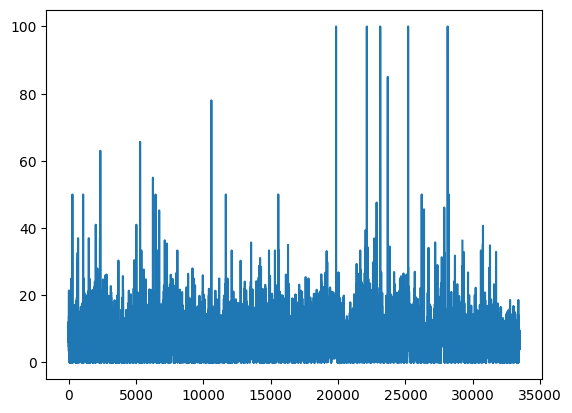

In [32]:
plt.plot(df['pct_carrier_delay'])